In [ ]:
# Hacemos Web Scrapping para obtener una data, importamos pickle
import requests
from bs4 import BeautifulSoup
import pickle

# Como nuestro scrapping se basara en transcripciones de peliculas vamos a scrapsfromtheloft.com
def url_to_transcript(url):
    '''Retorna la data transcrita desde scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="site-content").find_all('p')]
    print(url)
    return text

# URLs de las transcipciones
urls = ['https://scrapsfromtheloft.com/movies/the-northman-transcript/',
        'https://scrapsfromtheloft.com/movies/uncharted-2022-transcript/',
        'https://scrapsfromtheloft.com/movies/the-lost-city-2022-transcript/']

# Movie names
Movies = ['Northman', 'Uncharted', 'LostCity']

In [ ]:
# # Solicitar realmente las transcripciones (tarda unos minutos en ejecutarse)
transcripts = [url_to_transcript(u) for u in urls]



https://scrapsfromtheloft.com/movies/the-northman-transcript/
https://scrapsfromtheloft.com/movies/uncharted-2022-transcript/
https://scrapsfromtheloft.com/movies/the-lost-city-2022-transcript/


In [ ]:
# Recoge los archivos para su uso posterior

# Crea un nuevo directorio para guardar los archivos de texto
!mkdir transcripts

for i, c in enumerate(Movies):
 with open("transcripts/" + c + ".txt", "wb") as file:
  pickle.dump(transcripts[i], file)

In [ ]:
# Cargamos los archivos seleccionados
data = {}
for i, c in enumerate(Movies):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [ ]:
# Comprobamos que los datos se han cargado correctamente, en este paso nos arroja las keys de nuestro diccionario
data.keys()

dict_keys(['Northman', 'Uncharted', 'LostCity'])

In [ ]:
# Revisamos que de nuestra data, de la pelicula Northman nos arroje desde el inicio hasta la linea 2
data['Northman'][:2]

['Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later, Amleth is now a Viking who’s on a mission to save his mother, kill his uncle and avenge his father.',
 '* * *']

# **Limpieza de los Datos:**

# Preprocesamiento de Texto

Vamos a seguir el enfoque MVP(Producto minimo Viable)

Empezamos de forma sencilla e iteramos

# Pasos comunes de limpieza de datos en todo el texto:


1. Poner el texto en minúsculas** 
1. Eliminar los signos de puntuación
1. Eliminar los valores numéricos
1. Eliminar el texto común sin sentido (/n)













In [ ]:
# Vamos a seguir iterando 
next(iter(data.keys()))

'Northman'

In [ ]:
# Nuestro diccionario está actualmente en clave: Movie, valor: lista de formato de texto
next(iter(data.values()))

['Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later, Amleth is now a Viking who’s on a mission to save his mother, kill his uncle and avenge his father.',
 '* * *',
 '(THUNDER AND VOLCANIC RUMBLING)',
 '(RUMBLING CONTINUES)',
 'HE-WITCH: Hear me, Odinn, All-Father of the gods.',
 '(VOICES WHISPERING)',
 'Summon the shadows of ages past, when the thread spinning Norns ruled the fates of men.',
 'Hear of a prince’s vengeance quenched at the fiery Gates of Hel.',
 'A prince destined for Valholl.',
 'Hear me.',
 '(WHISPERING VOICES EXHALE)',
 '(HORNS BLOWING)',
 '(WAVES CRASHING)',
 '(RAVENS SQUAWKING)',
 '(SQUAWKING CONTINUES) (HORNS CONTINUE BLOWING)',
 '(MAN SHOUTS IN DISTANCE)',
 'He’s here.',
 '(EXCITED CHATTER IN DISTANCE) (DOGS BARKING)',
 'He’s here.',
 '(HORNS BLOWING IN DISTANCE) Mother, Father is here!',
 '(GASPS)',
 'Never enter my chambers without invitation!',
 'The king, milady. 

In [ ]:
# Vamos a cambiar esto a clave: Movie Valor: Formato String
def combine_text(list_of_text):
    
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Combinamos texto
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [ ]:
# Podemos mantenerlo en formato de diccionario o ponerlo en un dataframe de pandas
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
LostCity,"Follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model, until a kidnappin..."
Northman,"Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later..."
Uncharted,Street-smart Nathan Drake (Tom Holland) is recruited by seasoned treasure hunter Victor “Sully” Sullivan (Mark Wahlberg) to recover a fortune amas...


In [ ]:
# Vamos a revisar la transcripción de Northman
data_df.transcript.loc['Northman']

'Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later, Amleth is now a Viking who’s on a mission to save his mother, kill his uncle and avenge his father. * * * (THUNDER AND VOLCANIC RUMBLING) (RUMBLING CONTINUES) HE-WITCH: Hear me, Odinn, All-Father of the gods. (VOICES WHISPERING) Summon the shadows of ages past, when the thread spinning Norns ruled the fates of men. Hear of a prince’s vengeance quenched at the fiery Gates of Hel. A prince destined for Valholl. Hear me. (WHISPERING VOICES EXHALE) (HORNS BLOWING) (WAVES CRASHING) (RAVENS SQUAWKING) (SQUAWKING CONTINUES) (HORNS CONTINUE BLOWING) (MAN SHOUTS IN DISTANCE) He’s here. (EXCITED CHATTER IN DISTANCE) (DOGS BARKING) He’s here. (HORNS BLOWING IN DISTANCE) Mother, Father is here! (GASPS) Never enter my chambers without invitation! The king, milady. The king. (HORNS BLOWING IN DISTANCE) GUDRUN: Come. AMLETH: Odinn brought him home. (DOOR

Vamos a usar en python el modulo re, de expresiones regulares e importamos string, a continuación lo que vamos hacer es poner el texto en minúsculas, eliminar el texto entre corchetes, eliminar la puntuación y eliminar las palabras que contienen números.
Con esto, podemos comparar con el anterior y  vemos la diferencia


In [ ]:

import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [ ]:
# Observamos el texto actualizado en comparación con el anterior
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
LostCity,follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model until a kidnapping...
Northman,prince amleth is on the verge of becoming a man when his father is brutally murdered by his uncle who kidnaps the boy’s mother two decades later a...
Uncharted,streetsmart nathan drake tom holland is recruited by seasoned treasure hunter victor “sully” sullivan mark wahlberg to recover a fortune amassed b...


In [ ]:
# Haremos un segundo paso de limpieza de texto
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

Nos desharemos de algunos signos de puntuación adicionales y de textos sin sentido que se pasaron por alto la primera vez de la limpieza

In [ ]:
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
LostCity,follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model until a kidnapping...
Northman,prince amleth is on the verge of becoming a man when his father is brutally murdered by his uncle who kidnaps the boys mother two decades later am...
Uncharted,streetsmart nathan drake tom holland is recruited by seasoned treasure hunter victor sully sullivan mark wahlberg to recover a fortune amassed by ...


# **Organización de los datos**

La finalidad de este ejercicio sera obtener datos limpios y organizados en dos formatos de texto estándar:

1. Corpus - una colección de texto
2. Matriz Documento-Término - recuento de palabras en formato de matriz


# **Corpus**

El corpus es en pocas palabras una coleccion de textos, anteriormente lo hemos creado y los hemos puesto juntos y ordenados en un dataframe

In [ ]:
data_df

,transcript
LostCity,"Follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model, until a kidnappin..."
Northman,"Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later..."
Uncharted,Street-smart Nathan Drake (Tom Holland) is recruited by seasoned treasure hunter Victor “Sully” Sullivan (Mark Wahlberg) to recover a fortune amas...


In [ ]:
full_names = ['Northman', 'Uncharted', 'LostCity']

data_df['full_name'] = full_names
data_df

,transcript,full_name
LostCity,"Follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model, until a kidnappin...",Northman
Northman,"Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later...",Uncharted
Uncharted,Street-smart Nathan Drake (Tom Holland) is recruited by seasoned treasure hunter Victor “Sully” Sullivan (Mark Wahlberg) to recover a fortune amas...,LostCity


In [ ]:
data_df.to_pickle("corpus.pkl")

# **Matriz Documento-Término**

Vamos a dividir el texto en trozos mas pequeños de palabras o tokenizar. Podemos hacer eso con un conteo en python con la libreria Scikit-Learn, en este caso cada documento sera representado por una fila diferente, y cada columna representara una palabra diferente.

Con CountVectorizer, podemos eliminar las StopWords, que no nos añaden significado adicional al texto.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

,aalan,abajo,abate,abbi,abbreviated,abigail,able,abuela,academic,accept,...,younger,youre,youve,yuletide,yum,yyou,zero,ziggurat,zone,ódinn
LostCity,1,0,0,1,1,3,4,1,1,0,...,1,61,4,0,0,0,1,1,0,0
Northman,0,0,1,0,0,0,0,0,0,1,...,0,9,2,1,0,0,0,0,0,1
Uncharted,0,1,0,0,0,0,0,0,0,0,...,0,40,3,0,3,2,0,0,1,0


En este paso, excluimos stopwords comunes en el idioma ingles
Vamos a guardar todo esto para usarlo mas adelante.


In [ ]:
data_dtm.to_pickle("dtm.pkl")

In [ ]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

# **ANALISIS EXPLORATORIO DE DATOS**

Luego de realizar el paso de limpieza y poner nuestra data en un formato mas estandar, vamos a revisar nuestra data y ver si los datos tienen sentido. Antes de aplicar algún algoritmo.

Vamos a buscar si hay patrones en nuestro texto donde identifiquemos:



1. Las palabras mas comunes
2. El tamaño del vocabulario
3. Rapidez del dialogo
4. Cantidad de malas palabras




# **PALABRAS MAS COMUNES**

In [ ]:
#Analisis
#Procedemos a leer la matriz documento termino

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,LostCity,Northman,Uncharted
aalan,1,0,0
abajo,0,0,1
abate,0,1,0
abbi,1,0,0
abbreviated,1,0,0


In [ ]:
# Vamos a buscar las 30 palabras más pronunciadas en la pelicula

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'LostCity': [('okay', 116),
  ('im', 113),
  ('oh', 112),
  ('just', 105),
  ('dont', 74),
  ('like', 73),
  ('right', 72),
  ('youre', 61),
  ('know', 59),
  ('yeah', 54),
  ('uh', 46),
  ('come', 46),
  ('need', 43),
  ('gonna', 42),
  ('got', 40),
  ('think', 39),
  ('thats', 39),
  ('yes', 37),
  ('god', 36),
  ('loretta', 33),
  ('want', 33),
  ('alan', 33),
  ('sorry', 31),
  ('good', 29),
  ('people', 27),
  ('stop', 26),
  ('say', 26),
  ('dash', 25),
  ('did', 25),
  ('love', 24)],
 'Northman': [('man', 74),
  ('men', 63),
  ('fjolnir', 62),
  ('grunting', 62),
  ('continues', 59),
  ('panting', 56),
  ('grunts', 40),
  ('amleth', 38),
  ('yelling', 33),
  ('king', 30),
  ('father', 26),
  ('gunnar', 26),
  ('distance', 25),
  ('wildly', 24),
  ('sword', 24),
  ('softly', 23),
  ('laughing', 23),
  ('old', 23),
  ('come', 23),
  ('mother', 23),
  ('heart', 22),
  ('screaming', 22),
  ('blood', 20),
  ('barking', 20),
  ('kill', 19),
  ('know', 19),
  ('rakki', 19),
  ('gudrun

In [ ]:
# Vamos a mostrar por pantalla las 15 palabras mas dichas en cada pelicula

for Movies, top_words in top_dict.items():
    print(Movies)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

LostCity
okay, im, oh, just, dont, like, right, youre, know, yeah, uh, come, need, gonna
---
Northman
man, men, fjolnir, grunting, continues, panting, grunts, amleth, yelling, king, father, gunnar, distance, wildly
---
Uncharted
hey, sully, dont, im, oh, come, right, got, okay, nate, know, yeah, just, look
---


# **Seguimos nuestro analisis**

In [ ]:
#En este paso vamos a mirar las palabras las comunes y luego las  vamos añadir a lista de StopWords
#Sacaremos las primeras 30 palabras de cada pelicula

from collections import Counter
words = []
for Movies in data.columns:
    top = [word for (word, count) in top_dict[Movies]]
    for t in top:
        words.append(t)
        
words

['okay',
 'im',
 'oh',
 'just',
 'dont',
 'like',
 'right',
 'youre',
 'know',
 'yeah',
 'uh',
 'come',
 'need',
 'gonna',
 'got',
 'think',
 'thats',
 'yes',
 'god',
 'loretta',
 'want',
 'alan',
 'sorry',
 'good',
 'people',
 'stop',
 'say',
 'dash',
 'did',
 'love',
 'man',
 'men',
 'fjolnir',
 'grunting',
 'continues',
 'panting',
 'grunts',
 'amleth',
 'yelling',
 'king',
 'father',
 'gunnar',
 'distance',
 'wildly',
 'sword',
 'softly',
 'laughing',
 'old',
 'come',
 'mother',
 'heart',
 'screaming',
 'blood',
 'barking',
 'kill',
 'know',
 'rakki',
 'gudrun',
 'thorir',
 'son',
 'hey',
 'sully',
 'dont',
 'im',
 'oh',
 'come',
 'right',
 'got',
 'okay',
 'nate',
 'know',
 'yeah',
 'just',
 'look',
 'whoa',
 'think',
 'youre',
 'gonna',
 'gold',
 'did',
 'shit',
 'like',
 'thats',
 'chloe',
 'way',
 'sam',
 'kid',
 'good',
 'lets',
 'god']

In [ ]:
#Vamos a contar las palabras que mas se repiten y en que momento ocurren
Counter(words).most_common()


[('know', 3),
 ('come', 3),
 ('okay', 2),
 ('im', 2),
 ('oh', 2),
 ('just', 2),
 ('dont', 2),
 ('like', 2),
 ('right', 2),
 ('youre', 2),
 ('yeah', 2),
 ('gonna', 2),
 ('got', 2),
 ('think', 2),
 ('thats', 2),
 ('god', 2),
 ('good', 2),
 ('did', 2),
 ('uh', 1),
 ('need', 1),
 ('yes', 1),
 ('loretta', 1),
 ('want', 1),
 ('alan', 1),
 ('sorry', 1),
 ('people', 1),
 ('stop', 1),
 ('say', 1),
 ('dash', 1),
 ('love', 1),
 ('man', 1),
 ('men', 1),
 ('fjolnir', 1),
 ('grunting', 1),
 ('continues', 1),
 ('panting', 1),
 ('grunts', 1),
 ('amleth', 1),
 ('yelling', 1),
 ('king', 1),
 ('father', 1),
 ('gunnar', 1),
 ('distance', 1),
 ('wildly', 1),
 ('sword', 1),
 ('softly', 1),
 ('laughing', 1),
 ('old', 1),
 ('mother', 1),
 ('heart', 1),
 ('screaming', 1),
 ('blood', 1),
 ('barking', 1),
 ('kill', 1),
 ('rakki', 1),
 ('gudrun', 1),
 ('thorir', 1),
 ('son', 1),
 ('hey', 1),
 ('sully', 1),
 ('nate', 1),
 ('look', 1),
 ('whoa', 1),
 ('gold', 1),
 ('shit', 1),
 ('chloe', 1),
 ('way', 1),
 ('sam', 1

In [ ]:
#En este paso haremos lo siguiente: Vamos a ver en estas peliculas cuales palabras se repiten mas
#Si esta palabra en nuestra lista de peliculas se repite mas la excluiremos.

add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

# **Actualiazamos nuestra lista de StopWords**

In [ ]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Lectura de la data depurada
data_clean = pd.read_pickle('data_clean.pkl')

# Añadimos nuevas stopwords
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Volvemos a recrear la matriz documento termino
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Importamos pickle y salvamos para despues
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [ ]:
!pip install wordcloud
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=1423983d47ebb11319308402223f59e595ec58f1acc252a72ebae8572ca66853
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

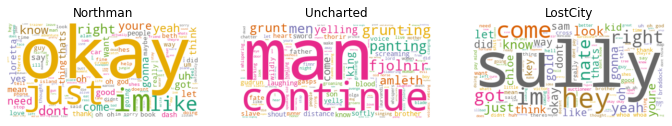

In [ ]:
# Establecemos las dimensiones de salida
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Northman', 'Uncharted', 'LostCity']

for index, Movies in enumerate(data.columns):
    wc.generate(data_clean.transcript[Movies])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

# **RESULTADOS**

1. En la pelicula Northman podemos ver que se usa mucho la palabra Okay


2. En la pelicula Uncharted se utiliza mucho la palabra man y continue, quiza debido a que es una pelicula por un actor joven tienda a decir esta palabra al llamar a su compañero, y continue debido a que como las 3 peliculas son de accion y aventura, hay que continuar la travesia.

3. En la pelicula LostCity, se utiliza mucho la palabra sully, que realmente no sabemos quien es sully, ya que ningun personaje principal se llama asi.










# **NUMERO DE PALABRAS**


In [ ]:
#Analisis
#Vamos a encontrar las palabras unicas de cada pelicula
#identificar los elementos no nulos en nuestra matriz documento termino, lo cual nos dice que la palabra aparece al menos una vez en las peliculas


unique_list = []
for Movies in data.columns:
    uniques = data[Movies].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Creamos un nuevo dataframe que contenga este conteo de palabras unicas
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['Movies', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,Movies,unique_words
1,Uncharted,1322
2,LostCity,1339
0,Northman,1747


In [ ]:
#Calculamos la cantidad de palabras por minuto de cada pelicula

# Encontrar el numero de palabras que cada pelicula
total_list = []
for Movies in data.columns:
    totals = sum(data[Movies])
    total_list.append(totals)
    
# Peliculas de acción/Aventura el tiempo de duración de cada una en IMDb en minutos.
run_times = [137, 116, 112]

# Añadimos nuevas columnas a nuestro dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Ordenamos el marco de datos por palabras por minuto para ver quién habla más lento y más rápido
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,Movies,unique_words,total_words,run_times,words_per_minute
1,Uncharted,1322,4017,116,34.629310
2,LostCity,1339,4461,112,39.830357
0,Northman,1747,5465,137,39.890511


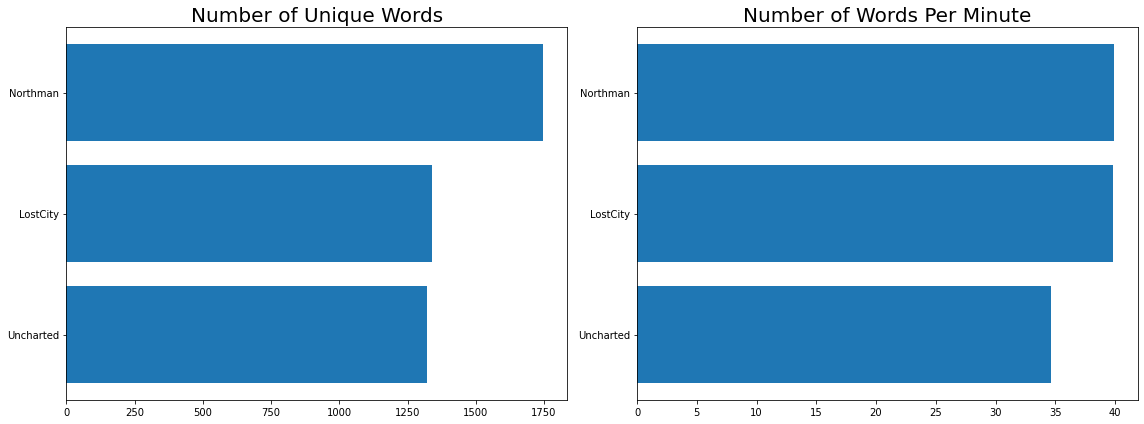

In [ ]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Movies)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.Movies)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

# **RESULTADOS**


1. Northman y LostCity tiene una cantidad de palabras por minuto muy similar

2. Uncharted es de las 3, la pelicula con menos palabras por minuto

3. Uncharted y LostCity tienen un numero similar de palabras unicas 

# **CANTIDAD DE MALAS PALABRAS**

In [ ]:
#Analisis
Counter(words).most_common()

[('know', 3),
 ('come', 3),
 ('okay', 2),
 ('im', 2),
 ('oh', 2),
 ('just', 2),
 ('dont', 2),
 ('like', 2),
 ('right', 2),
 ('youre', 2),
 ('yeah', 2),
 ('gonna', 2),
 ('got', 2),
 ('think', 2),
 ('thats', 2),
 ('god', 2),
 ('good', 2),
 ('did', 2),
 ('uh', 1),
 ('need', 1),
 ('yes', 1),
 ('loretta', 1),
 ('want', 1),
 ('alan', 1),
 ('sorry', 1),
 ('people', 1),
 ('stop', 1),
 ('say', 1),
 ('dash', 1),
 ('love', 1),
 ('man', 1),
 ('men', 1),
 ('fjolnir', 1),
 ('grunting', 1),
 ('continues', 1),
 ('panting', 1),
 ('grunts', 1),
 ('amleth', 1),
 ('yelling', 1),
 ('king', 1),
 ('father', 1),
 ('gunnar', 1),
 ('distance', 1),
 ('wildly', 1),
 ('sword', 1),
 ('softly', 1),
 ('laughing', 1),
 ('old', 1),
 ('mother', 1),
 ('heart', 1),
 ('screaming', 1),
 ('blood', 1),
 ('barking', 1),
 ('kill', 1),
 ('rakki', 1),
 ('gudrun', 1),
 ('thorir', 1),
 ('son', 1),
 ('hey', 1),
 ('sully', 1),
 ('nate', 1),
 ('look', 1),
 ('whoa', 1),
 ('gold', 1),
 ('shit', 1),
 ('chloe', 1),
 ('way', 1),
 ('sam', 1

In [ ]:
#Aislamos las malas palabras

data_bad_words = data.transpose()[['asshole','shit']]
data_profanity = pd.concat([data_bad_words.asshole, data_bad_words.shit], axis=1)
data_profanity.columns = ['a_word', 's_word']
data_profanity

,a_word,s_word
LostCity,3,3
Northman,0,1
Uncharted,0,32


# **RESULTADOS**

1. Northman y Uncharted no poseen malas palabras que empiecen por a

2. No se suele decir malas palabras por a en 2 de las 3 peliculas seleccionadas

3. Uncharted repite muchas malas palabras por s

# **ANALISIS DE SENTIMIENTO**


# **Rutina de sentimiento**



In [ ]:
#Leemos el corpus, el cual posee el orden de las palabras
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
LostCity,"Follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model, until a kidnappin...",Northman
Northman,"Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later...",Uncharted
Uncharted,Street-smart Nathan Drake (Tom Holland) is recruited by seasoned treasure hunter Victor “Sully” Sullivan (Mark Wahlberg) to recover a fortune amas...,LostCity


In [ ]:
#Creamos una funcion lambda para encontrar la polaridad y la subjetividad de cada rutina
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
LostCity,"Follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model, until a kidnappin...",Northman,0.157257,0.518125
Northman,"Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later...",Uncharted,0.021952,0.519461
Uncharted,Street-smart Nathan Drake (Tom Holland) is recruited by seasoned treasure hunter Victor “Sully” Sullivan (Mark Wahlberg) to recover a fortune amas...,LostCity,0.120925,0.515886


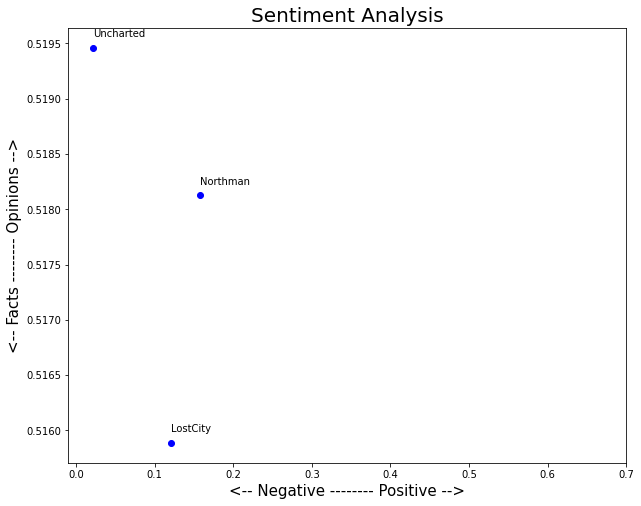

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, Movies in enumerate(data.index):
    x = data.polarity.loc[Movies]
    y = data.subjectivity.loc[Movies]
    plt.scatter(x, y, color='blue')
    plt.text(x+.0001, y+.0001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .70) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# **RUTINA DE SENTIMIENTO A TRAVES DEL TIEMPO**

In [ ]:
#Tomamos una cadena de texto y la dividimos en n partes iguales
#Tendran un valor por defecto de 10 partes iguales
import math

def split_text(text, n=10):

    # Calcula la longitud del texto, el tamaño de cada trozo de texto y los puntos de partida de cada trozo de texto
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Sacamos trozos de texto de igual tamaño y los ponemos en una lista
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [ ]:
data

,transcript,full_name,polarity,subjectivity
LostCity,"Follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model, until a kidnappin...",Northman,0.157257,0.518125
Northman,"Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later...",Uncharted,0.021952,0.519461
Uncharted,Street-smart Nathan Drake (Tom Holland) is recruited by seasoned treasure hunter Victor “Sully” Sullivan (Mark Wahlberg) to recover a fortune amas...,LostCity,0.120925,0.515886


In [ ]:
#Creamos una lista que contenga todas las piezas de texto

list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model, until a kidnapping attempt sweeps them both into a cutthroat jungle adventure, proving life can be so much stranger, and more romantic, than any of her paperback fictions. * * * [sighs] [both breathing heavily] You were incredible. My heart is still racing. I felt it too. All thanks to your brute strength, Dash, and your knowledge of ancient Aramaic mathematics. Please. This has nothing to do with my two doctorates and my master’s in Gender Studies and everything to do with you, Dr. Love more. The truth is, I never thought I would find the Lost City of D. I would choose your words carefully. [Hissing] They will be your last. You led me right to King Kalaman’s tomb and his queen’s legendary Crown of Fire. And now I will be very rich, and you will be very dead. Hold up. Are these… Are these your snakes? No, they were just here. There were just hundreds of sn

In [ ]:
#La lista tiene 3 elementos, uno por cada transcripcion
len(list_pieces)

3

In [ ]:
#Cada transcripcion ha sido dividido en 10 partes de texto
len(list_pieces[0])

10

In [ ]:
#Calculamos la polaridad por cada una de las piezas de texto

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.22174356606696055,
  0.14811257171013273,
  0.14113270308123252,
  0.20686727335164834,
  0.23166666666666666,
  0.161914324347835,
  0.1833767361111111,
  0.12009795499639249,
  0.041777950116440206,
  0.13522390545277357],
 [0.02613274513426952,
  -0.03825020067619558,
  -0.046057916537827245,
  -0.007452574525745253,
  0.0773709753787879,
  0.010939754689754708,
  0.034361143052549316,
  0.16962043321630216,
  -0.05613179669030734,
  0.025633479332458922],
 [0.10793575858373647,
  0.048101761252446175,
  0.16089218833600855,
  0.09538586549084598,
  0.14899678972712688,
  0.1658344831580043,
  0.09599206349206348,
  0.028258501147623738,
  0.18379074383809238,
  0.15210018533260722]]

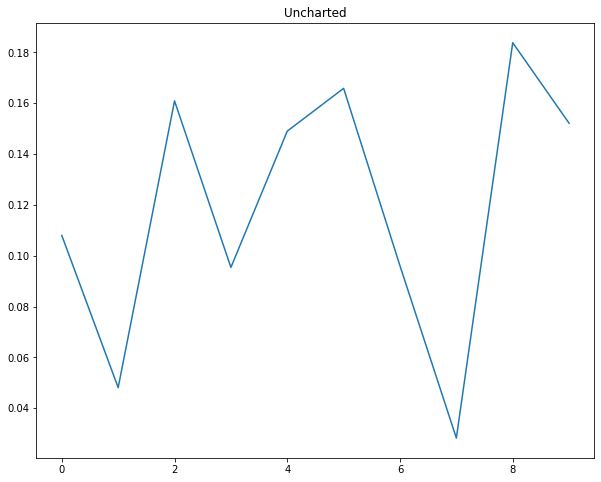

In [ ]:
#Graficamos para una de las peliculas

plt.plot(polarity_transcript[2])
plt.title(data['full_name'].index[2])
plt.show()

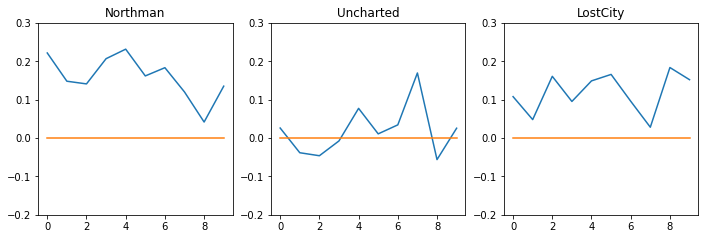

In [ ]:
#Graficamos todos las peliculas

plt.rcParams['figure.figsize'] = [16, 12]

for index, Movies in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

RESULTADOS

Podemos observar:

1. Northman ha tenido momentos positivos y negativos, pero no logro mantenerse en lo más alto

2. Uncharted tuvo un inicio negativo, pero a través del tiempo aumento positivamente para luego finalizar negativamente

3. LostCity podría decirse que se ha mantenido en un patrón estable, con fluctuaciones pero sigue el mismo patrón y puntuación.

# **Generación Texto**

In [ ]:
data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
LostCity,"Follows a reclusive romance novelist who was sure nothing could be worse than getting stuck on a book tour with her cover model, until a kidnappin...",Northman
Northman,"Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later...",Uncharted
Uncharted,Street-smart Nathan Drake (Tom Holland) is recruited by seasoned treasure hunter Victor “Sully” Sullivan (Mark Wahlberg) to recover a fortune amas...,LostCity


In [ ]:
Northman_text = data.transcript.loc['Northman']
Northman_text[:200]

'Prince Amleth is on the verge of becoming a man when his father is brutally murdered by his uncle, who kidnaps the boy’s mother. Two decades later, Amleth is now a Viking who’s on a mission to save hi'

# **Construyendo una función de la cadena de Markov**

In [ ]:
from collections import defaultdict
def markov_chain(text):
  
    # Tokenizar el texto por palabras, aunque incluyendo los signos de puntuación
    words = text.split(' ')
    
    # Inicializar un diccionario por defecto para contener todas las palabras y las siguientes palabras
    m_dict = defaultdict(list)
    
    # Cree una lista comprimida de todos los pares de palabras y los puse en formato palabra: lista de palabras siguientes
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convertir el dict por defecto en un diccionario
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
North_dict = markov_chain(Northman_text)
North_dict

{'Prince': ['Amleth', 'Amleth,', 'Amleth.'],
 'Amleth': ['is', 'is', 'to', 'is', 'the'],
 'is': ['on',
  'brutally',
  'now',
  'here!',
  'a',
  'the',
  'our',
  'it',
  'to',
  'women',
  'set',
  'the',
  'dead!',
  'dead.',
  'not',
  'this',
  'luck.',
  'that?',
  'your',
  'show',
  'here.',
  'a',
  'come!',
  'a',
  'fated.',
  'the',
  'nothing.',
  'the',
  'long',
  'my',
  'a',
  'it,',
  'deemed',
  'not',
  'trollish',
  'also',
  'long.',
  'to',
  'true?',
  'dear',
  'your',
  'this?',
  'no',
  'my',
  'here.',
  'Amleth.',
  'the',
  'you.',
  'it?',
  'not',
  'my',
  'upon',
  'not',
  'all',
  'for',
  'nothing',
  'inside',
  'now',
  'grown.',
  'super',
  'utterly',
  'calculated;',
  'as'],
 'on': ['the',
  'a',
  'Fjolnir.',
  'your',
  'your',
  'what',
  'your',
  'with',
  'a',
  'me',
  'my',
  'his',
  'the'],
 'the': ['verge',
  'boy’s',
  'gods.',
  'shadows',
  'thread',
  'fates',
  'fiery',
  'queen’s',
  'War-Raven!',
  'Kingdom',
  'same',
  'th

# **Generador de Texto**

In [ ]:
import random

def generate_sentence(chain, count=15):

    # Poner en mayúsculas la primera palabra
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Se genera la segunda palabra de la lista de valores. Se Establece la nueva palabra como la primera luego Repetir la operación
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # Terminar con un punto
    sentence += '.'
    return(sentence)

In [ ]:
generate_sentence(North_dict)

'Out his death. Yet I seek the blood from him. (MEN SHOUTING) MAN: Woman! (ASHILDUR.'